# UNO Card Game Simulator

This is the steering console where simulations of the UNO card game can be executed. There are two different Reinforcement Learning Models implemented, which can be selected together with their respective model parameters.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Win-Rate" data-toc-modified-id="Win-Rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Win Rate</a></span></li><li><span><a href="#Q-Values" data-toc-modified-id="Q-Values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Q-Values</a></span></li><li><span><a href="#Visits" data-toc-modified-id="Visits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visits</a></span></li><li><span><a href="#Possible-Moves" data-toc-modified-id="Possible-Moves-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Possible Moves</a></span></li></ul></li><li><span><a href="#Extraction" data-toc-modified-id="Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extraction</a></span></li></ul></div>

### Libraries
***

In [1]:
# Ensure that all requisite public libraries are installed
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [2]:
# Custom libraries
import environment as uno
import q_learning_agent as rlagent
import strategy_agent as sagent

# Public libraries
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

### Run
***

In [3]:
winners, turns, coverage = list(), list(), list()

In [4]:
# Agent parameters
agent_info = {"epsilon"  : .1, 
              "step_size": .2, 
              "model": None}


# Run simulations
run = uno.tournament(iterations = 1000,
                     agent1 = rlagent.QLearningAgent(agent_info),
                     agent2 = None, #random strategy agent
                     comment = False)


winners.extend(run[0])
turns.extend(run[1])
coverage.extend(run[2])

  0%|          | 0/1000 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'prev_state'

### Analysis
***

#### Win Rate

In [7]:
winners.count("q-learning")/len(winners)

0.51246

In [9]:
result = pd.concat([pd.Series(winners), pd.Series(turns)], axis = 1)
result = result.rename(columns={0:"Winner",1:"Turns"})

result["Win_rate"] = result["Winner"].apply(lambda x: 1 if x == "q-learning" else 0)
result["Win_rate"] = result["Win_rate"].cumsum()/(result.index+1)

result.tail()

,Winner,Turns,Win_rate
99995,Magdalena,117,0.512440
99996,Bernhard,43,0.512445
99997,Bernhard,22,0.512450
99998,Bernhard,109,0.512455
99999,Bernhard,34,0.512460


In [10]:
result["Winner"][-10000:].value_counts()

Bernhard     5106
Magdalena    4894
Name: Winner, dtype: int64

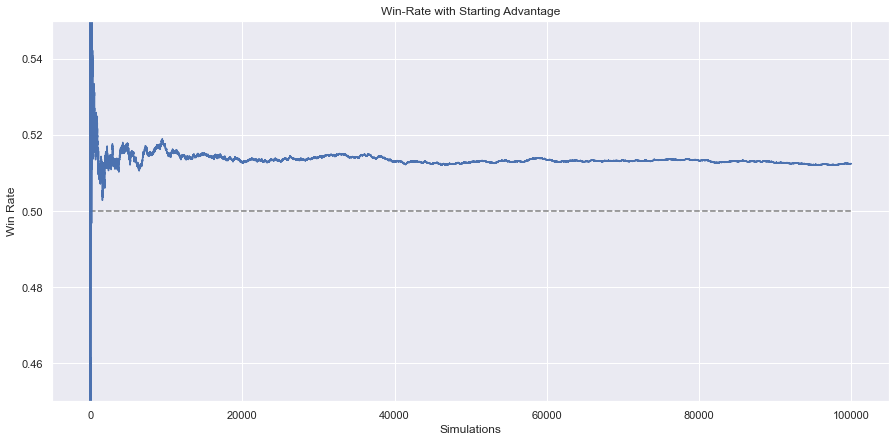

In [141]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(result.index, result["Win_rate"])
plt.hlines(0.5, 0, len(winners), colors="grey", linestyles="dashed")

# Formatting
plt.title("Win-Rate with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.ylim((0.45,0.55))

plt.show()